In [1]:
from NN import LayerNetwork
from Gate import *
import matplotlib.pyplot as plt
import numpy as np
import logging

%matplotlib inline
logging.basicConfig(level=logging.WARN)

Lets use the spiral dataset to demonstrate the neural network.

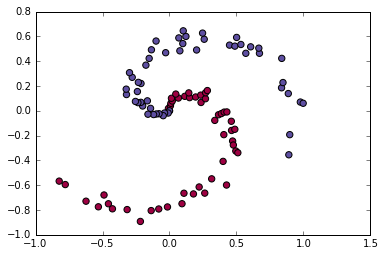

In [3]:
N = 50 # number of points per class
D = 2 # dimensionality
K = 2 # number of classes
X = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels
for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j

# lets visualize the data:
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.show()

Rather than trying to model this dataset with just x and y as features, we will generate features x, y, x<sup>2</sup> and y<sup>2</sup> as our input features. Note that our simple implementation of a neural network required that labels are either 1 or -1.

In [7]:
def gen_features(xy):
    return xy[0], xy[1], xy[0]**2, xy[1]**2
data = np.array([gen_features(x) for x in X])
labels = [1 if x else -1 for x in y]

This function do the majority of the work. It trains the neural network for a number of iterations, and plots intermediate results of the network

In [8]:
def train_model(model, data, labels, niter=400, nplots=6):
    colors = ['blue' if x == 1 else 'green' for x in labels]

    def eval_model(data, labels, model):
        return sum([model.predict(d) == l for d, l in zip(data, labels)]) * 100. / len(labels)

    plot_freq = niter // nplots

    scores = []
    fsize = 6
    fig = plt.figure(figsize=(fsize * 2, fsize*nplots))
    pn = 1
    for i in range(niter):
        # Train on all the data in this iteration
        for d, l in zip(data, labels):
            model.train(d, l)

            
        if i % plot_freq == 0 or i == niter - 1:
            print("Done %d training rounds (%i runs)" % (i, i * len(labels)))

            ax = fig.add_subplot(nplots + 1, 2, pn)

            pn += 1

            # Also plot a background mesh for the NN decision boundary
            x_min, y_min = -1.5, -1.5
            x_max, y_max = 1.5, 1.5
            h = 0.1
            xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                             np.arange(y_min, y_max, h))
            Z = np.array([model.predict(gen_features(vals)) for vals in np.c_[xx.ravel(), yy.ravel()]])
            Z = Z.reshape(xx.shape)
            
            ax.contourf(xx, yy, Z, cmap='Blues')

            ax.scatter(*data.T, color=colors)
            ax.set_title("%d" % i)
    fig.show()

Done 0 training rounds (0 runs)
Done 400 training rounds (40000 runs)
Done 800 training rounds (80000 runs)
Done 1200 training rounds (120000 runs)
Done 1600 training rounds (160000 runs)
Done 2000 training rounds (200000 runs)
Done 2400 training rounds (240000 runs)
Done 2800 training rounds (280000 runs)
Done 3200 training rounds (320000 runs)
Done 3600 training rounds (360000 runs)
Done 3999 training rounds (399900 runs)


/Users/tom/anaconda3/lib/python3.5/site-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


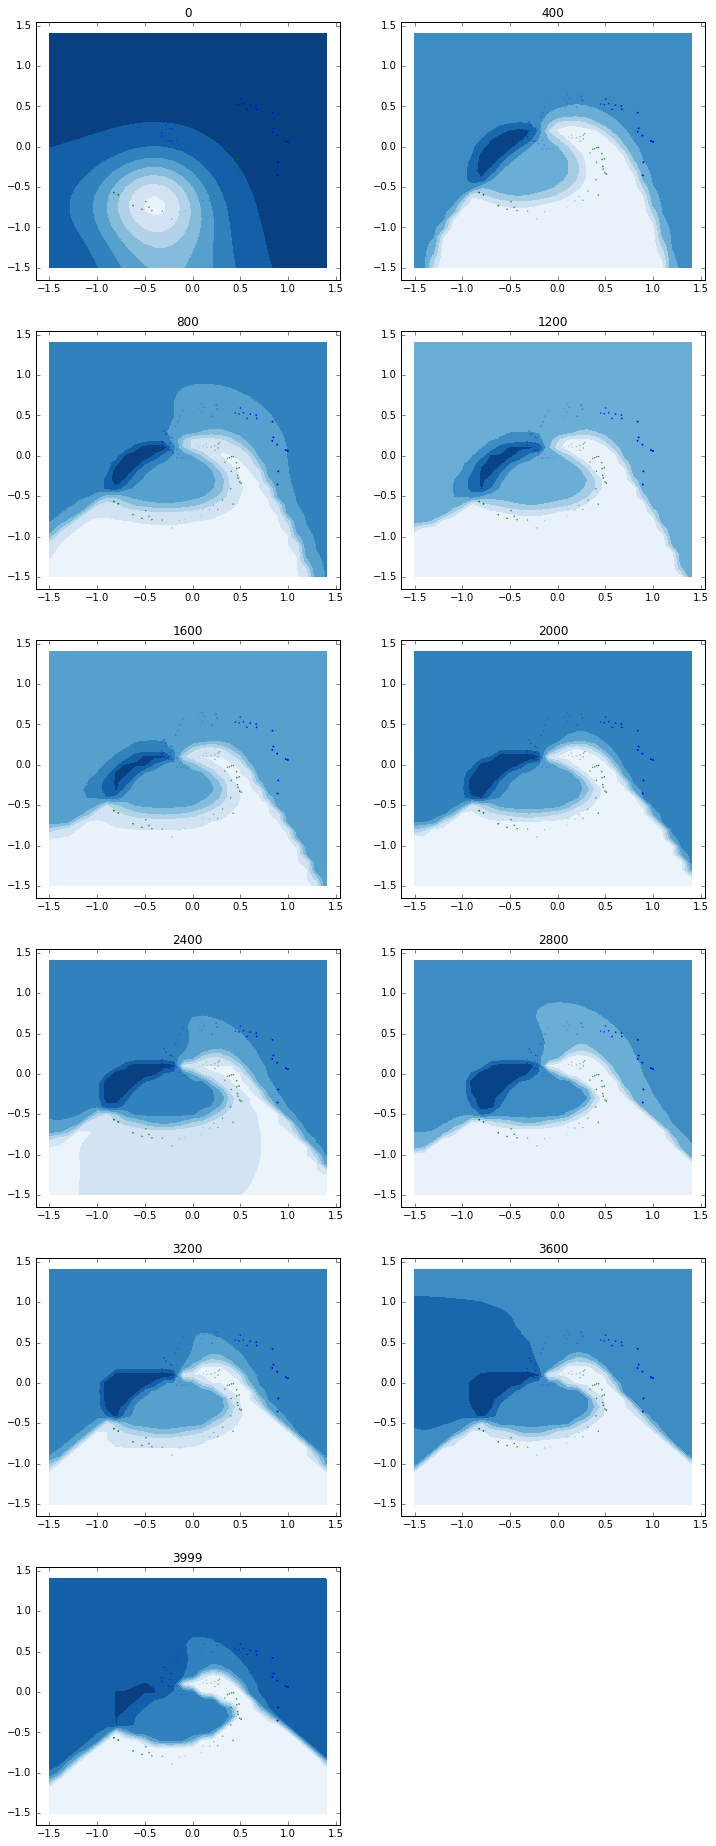

In [10]:
model = LayerNetwork(4, layers=[8, 2, 2], ActivationGate=TanHGate, step_size = 0.03, regularisation=False)
train_model(model, data, labels, niter=4000, nplots=10)

yey, we learnt a complex decision boundary!